In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00


In [2]:
fileROOT = root.TFile('../../Data/PMTgem/CosmiciPMTgem_450.root')#"chargeDataBlu.root") #nome del rootfile
tree = fileROOT.Get("t1") #nome del datatree

nDat = 1024*4 #numero dati per evento
nEvts = tree.GetEntries() #numero di eventi
n = 1024
#creo due array vuoti per salvare wave_array e time_array del .root

wave = np.zeros((nEvts,nDat))
time = np.zeros((nEvts,nDat))

#eseguo un ciclo sul tree e salvo i dati dentro gli array come ulteriori array...
#quindi adesso avrò array 2d in cui il primo indice si riferisce all'evento e il secondo al dato 
#contenuto dentro quell'evento
i=0
for dat in tree:
    wave[i] = np.array(dat.wave_array)
    time[i] = np.array(dat.time_array)
    i = i+1
    
print(nEvts)

10


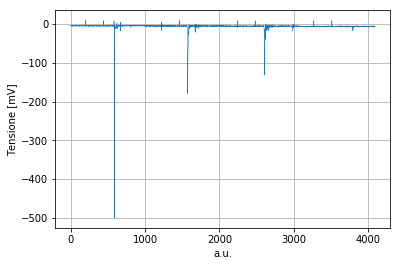

In [84]:
plt.plot(wave[9] , linewidth = .5)#stampo il 5o evento
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

In [66]:
waveCh1 = np.zeros((nEvts,n))
waveCh2 = np.zeros((nEvts,n))
waveCh3 = np.zeros((nEvts,n))
waveCh4 = np.zeros((nEvts,n))

timeCh1 = np.zeros((nEvts,n))
timeCh2 = np.zeros((nEvts,n))
timeCh3 = np.zeros((nEvts,n))
timeCh4 = np.zeros((nEvts,n))


print(waveCh1.shape , nDat/4)

for i in range(nEvts):
    for j in range(nDat):
        if j < nDat/4:
            waveCh1[i][j] = wave[i][j]
            timeCh1[i][j] = time[i][j]
        elif j >= nDat/4 and j < nDat/2:
            waveCh2[i][j-n] = wave[i][j]
            timeCh2[i][j-n] = time[i][j]
        elif j >= nDat/2 and j < nDat*3/4:
            waveCh3[i][j-2*n] = wave[i][j]
            timeCh3[i][j-2*n] = time[i][j]
        elif j >= nDat*3/4: 
            waveCh4[i][j-3*n] = wave[i][j]
            timeCh4[i][j-3*n] = time[i][j]


((1000, 1024), 1024)


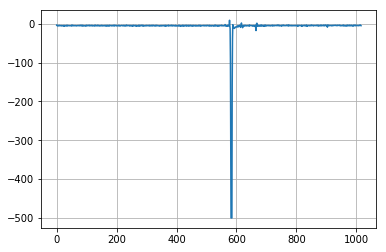

(8, 1, 0.9928385615348816)
(203, 1, 0.9928385615348816)
(205, 1, 0.9928385615348816)
(443, 1, 0.9928385615348816)
(632, 1, 0.9928385615348816)
(777, 1, 0.9928385615348816)
(935, 1, 0.9928385615348816)
7


In [67]:
plt.plot(timeCh1[1] , waveCh1[1])
plt.grid()
#plt.xlim(0,3)
plt.show()
j= 0
for i in range(nEvts):
    if min(waveCh4[i]) < -110 and waveCh4[i].argmin() < 5: 
        print(i , waveCh4[i].argmin() , timeCh4[i][waveCh4[i].argmin()])
        j = j+1
print(j)

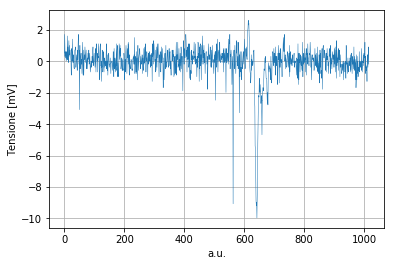

In [73]:
#scorro i dati e per ciascun evento seleziono una zona pre-segnale di cui faccio la media
#riscrivo quindi i dati scalandoli della media di piedistallo
for i in range(nEvts):
    waveCh4[i] = waveCh4[i]-np.mean(waveCh4[i][100:200])
    
#stampo la forma d'onda riscalata
plt.plot(timeCh4[200] , waveCh4[200] , linewidth = 0.5)
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

992


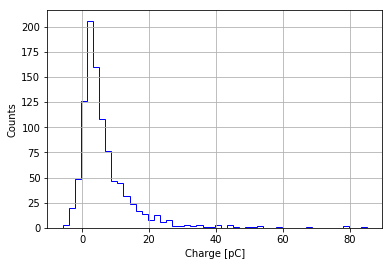

In [69]:
waveCh4A = np.zeros((nEvts-j,n))
R = 50 #resistenza in Ohm

k=0
for i in np.arange(1,nEvts):
    #butto gli eventi con il picco strano
    if min(waveCh4[i]) >= -110 or (min(waveCh4[i])< -110  and waveCh4[i].argmin() != 1):
        #seleziono solo gli eventi che hanno picchi sotto i 50mV (è una prova)
        #if min(waveCh4[i]) >= -100: 
        waveCh4A[k] = waveCh4[i]/R #conversione dati Tensione -> dati Corrente
        k = k+1
    else: 1 
        #print(min(waveCh4[i]) , waveCh4[i].argmin() , i) #check
        
        
print(k)#check
integral = np.zeros(k)

#Eseguo l'Integrale
for i in range(k):
    integral[i] = sum(-waveCh4A[i])
    
#Istogramma di Carica    
#plt.title('Preliminary Charge Histogram Cherenkov')
plt.ylabel('Counts')
plt.xlabel('Charge [pC]')
y,x,_ = plt.hist(integral , bins=50 , color = 'B', histtype = 'step' , fill = False)
plt.grid()




In [70]:
from ROOT import TMath , TCanvas , TGraph , TH1D

h1 = TH1D( 'h1', 'This is the px distribution', 100, -30, 30 )

for i in integral:
    h1.Fill(i)


In [25]:
c = TCanvas()
g = TGraph(x.size, x.astype(np.double),y.astype(np.double))

fit = g.Fit("gaus" , "S")


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      58401.5
NDf                       =           48
Edm                       =   5.3587e-07
NCalls                    =           91
Constant                  =      1964.18   +/-   32.9675     
Mean                      =      4.02178   +/-   0.0647134   
Sigma                     =      3.31786   +/-   0.0652856    	 (limited)


In [27]:
m = fit.Get().Parameter(1)